In [1]:
import pandas as pd
from fbprophet import Prophet 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Traffic data.csv to Traffic data.csv


In [24]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Traffic data.csv']))
df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [5]:
df.isnull().sum()

ID          0
Datetime    0
Count       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


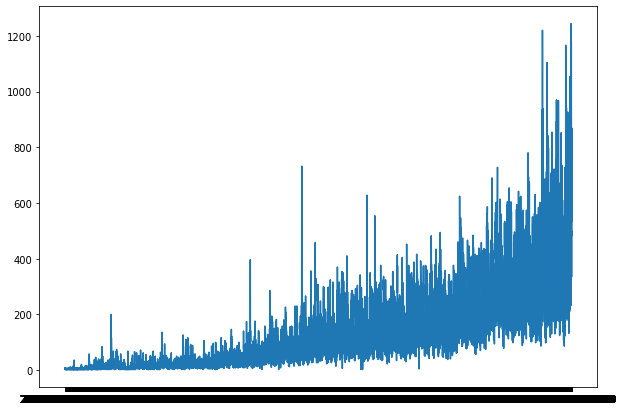

In [12]:
plt.figure(figsize=(10,7))
plt.plot(df["Datetime"],df["Count"]);

In [25]:
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%d-%m-%Y %H:%M')
df.index = df['Datetime']
df['y'] = df['Count']
df.drop(columns=['ID', 'Datetime', 'Count'], axis=1, inplace=True)


In [26]:
df.head()

,y
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2


In [27]:
df=df.resample("D").sum()

In [28]:
df.head()

,y
Datetime,
2012-08-25,76
2012-08-26,88
2012-08-27,62
2012-08-28,58
2012-08-29,60


In [29]:

df['ds'] = df.index
df.head()

,y,ds
Datetime,,
2012-08-25,76,2012-08-25
2012-08-26,88,2012-08-26
2012-08-27,62,2012-08-27
2012-08-28,58,2012-08-28
2012-08-29,60,2012-08-29


In [30]:
model=Prophet()

In [31]:
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [33]:
future_dates=model.make_future_dataframe(periods=200)

In [35]:
 future_dates

,ds
0,2012-08-25
1,2012-08-26
2,2012-08-27
3,2012-08-28
4,2012-08-29
...,...
957,2015-04-09
958,2015-04-10
959,2015-04-11
960,2015-04-12


In [36]:
prediction=model.predict(future_dates)

In [37]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25,-688.293118,-2309.965048,50.859046,-688.293118,-688.293118,-425.110934,-425.110934,-425.110934,-995.178731,-995.178731,-995.178731,570.067796,570.067796,570.067796,0.0,0.0,0.0,-1113.404053
1,2012-08-26,-680.178755,-2449.495016,-72.730292,-680.178755,-680.178755,-583.189447,-583.189447,-583.189447,-1144.261138,-1144.261138,-1144.261138,561.071691,561.071691,561.071691,0.0,0.0,0.0,-1263.368201
2,2012-08-27,-672.064391,-814.007491,1521.592856,-672.064391,-672.064391,1006.818358,1006.818358,1006.818358,457.612404,457.612404,457.612404,549.205954,549.205954,549.205954,0.0,0.0,0.0,334.753967
3,2012-08-28,-663.950027,-725.504334,1651.267449,-663.950027,-663.950027,1143.672778,1143.672778,1143.672778,608.392187,608.392187,608.392187,535.280591,535.280591,535.280591,0.0,0.0,0.0,479.722751
4,2012-08-29,-655.835664,-818.635406,1594.537658,-655.835664,-655.835664,1077.042853,1077.042853,1077.042853,556.918152,556.918152,556.918152,520.124701,520.124701,520.124701,0.0,0.0,0.0,421.207189


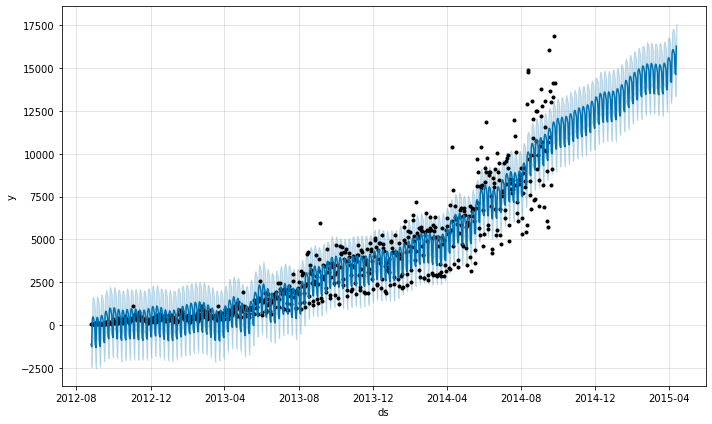

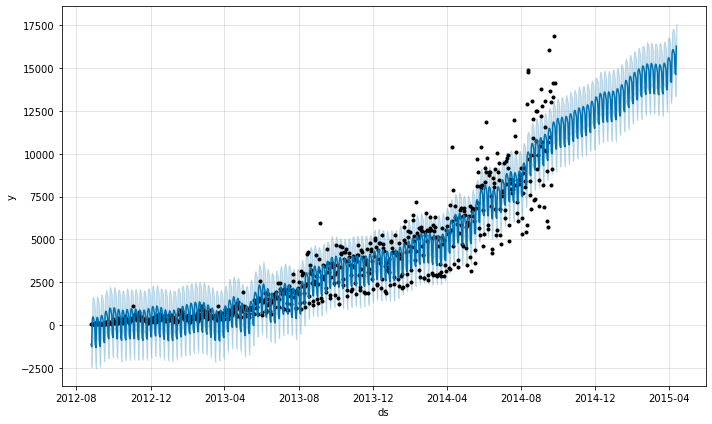

In [38]:
model.plot(prediction)

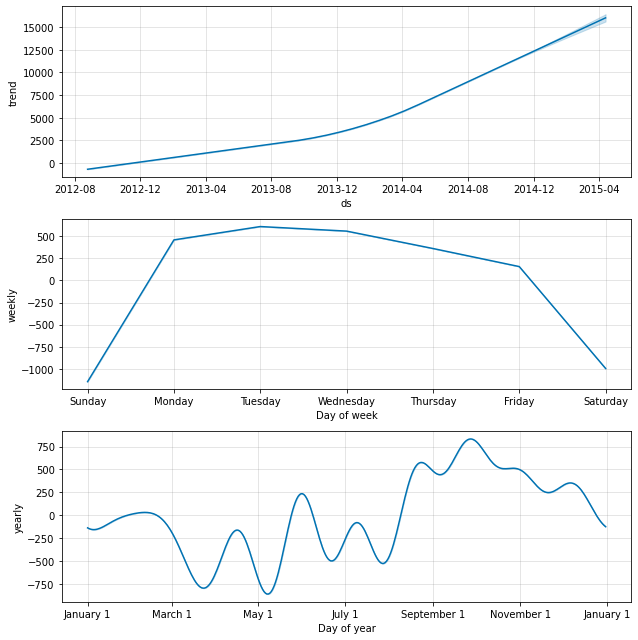

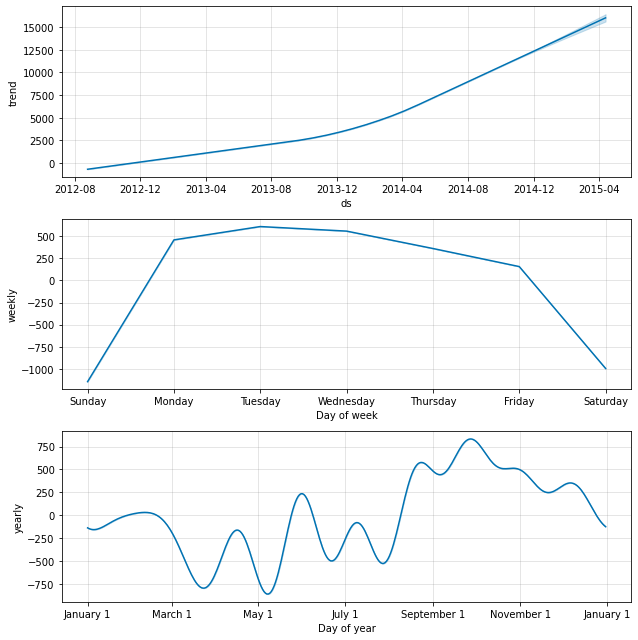

In [39]:
model.plot_components(prediction)